## Text Analysis - F.R.I.E.N.D.S.
The aim of this project is to provide and extended exploratory data analysis and further insights on the TV show 'FRIENDS' based on the script of the TV show. **Please note that the analysis includes SPOILERS!**

### Data preparation
As the first step of the project, I started with importing the necessary libraries and loading the data. As my dataset is originally part of the R package 'friends' and was stored in .rda format, I needed to install pyreadr to read the file in Python. As the data was stored in a dictionary, I extracted the 'friends' object and stored it in a dataframe.

In [1]:
# import libraries
#pip install pyreadr
import pandas as pd
import pyreadr # to read .rda file
import os
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set working directory and load the data

os.chdir("/Users/vargh/OneDrive/Dokumentumok/Python-Programming-and-Text-Analysis-master/HW")
mydir = "/Users/vargh/OneDrive/Dokumentumok/Python-Programming-and-Text-Analysis-master/HW"

data = pyreadr.read_r(mydir +'/friends.rda')

In [3]:
# Chek what data includes
print(data.keys()) #data is a dictionary, we will need the 'friends' object
df = data['friends']
df.head()

odict_keys(['friends'])


,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


### Exploratory data analysis
The resulting dataframe consisted of six columns:
- **text**: includes the script of a particular character 
- **speaker**: includes the character to whom the script belongs
- **season**: includes the season in which the text occured
- **episode**: includes the episode from the season in which the text occured
- **scene**: includes the scene from the episode in which the text occured
- **utterance**: includes the utterance from the scene in which the text occured


**Missing values**

First, I checked whether there are missing values in the data and found that there were 276 lines where the speaker was missing. As knowing which character said the certain lines matter in my analysis, I decided to drop these rows.

In [4]:
# check the length of the dataframe
len(df) # it has 67369 rows
print('The dataframe has {} rows.'.format(len(df)))

# check missing values 
df['text'].isnull().sum()
df['speaker'].isnull().sum()
df['season'].isnull().sum()
df['episode'].isnull().sum()
df['scene'].isnull().sum()
df['utterance'].isnull().sum()

print('The number of missing values in text column is {}'.format(df['text'].isnull().sum()))
print('The number of missing values in speaker column is {}'.format(df['speaker'].isnull().sum()))
print('The number of missing values in season column is {}'.format(df['season'].isnull().sum()))
print('The number of missing values in episode column is {}'.format(df['episode'].isnull().sum()))
print('The number of missing values in scene column is {}'.format(df['scene'].isnull().sum()))
print('The number of missing values in utterance column is {}'.format(df['utterance'].isnull().sum()))

# drop rows where speaker is missing
df = df.dropna(subset=['speaker']).reindex()

print('The dataframe has {} rows after dropping rows where speaker is missing.'.format(len(df)))

The dataframe has 67359 rows.
The number of missing values in text column is 0
The number of missing values in speaker column is 276
The number of missing values in season column is 0
The number of missing values in episode column is 0
The number of missing values in scene column is 0
The number of missing values in utterance column is 0
The dataframe has 67083 rows after dropping rows where speaker is missing.


**Seasons, episodes & characters**

To check if the data is complete and in line with IMDB, I calculated the number of seasons and episodes. The tv show indeed has 10 seasons and 236 episodes in total.

In [5]:
# How many season weret there in total?
df['season'].unique() #10 seasons

print("The series has {} seasons.".format(len(df['season'].unique())))

# How many episodes where there in total?
df['se'] = df['season'].map(str) + '/' + df['episode'].map(str)
len(df['se'].unique()) #236 episodes

print("The series has {} episodes.".format(len(df['se'].unique())))

The series has 10 seasons.
The series has 236 episodes.


Then I checked the number of unique speakers in the show: First I got 699 unique speakers, but taking a closer look to the results I realized that (1) there where many lines assigned to all characters and (2) scene directions were also included as scripts in the data. After droppin these rows, the number of speakers decreased to 697. 

In [6]:
# Check unique speakers and how many times they spoke in the tv show
df['speaker'].unique()
df['speaker'].value_counts()

Rachel Green       9307
Ross Geller        9157
Chandler Bing      8462
Monica Geller      8440
Joey Tribbiani     8171
                   ... 
Mel                   1
Female Jeweler        1
Zoe                   1
Second Dorm Guy       1
Alex                  1
Name: speaker, Length: 699, dtype: int64

In [7]:
# Drop where speaker is "Scene Directions" and "#ALL" 
df.drop(df.index[df['speaker'] == "#ALL#"], inplace=True)
df.drop(df.index[df['speaker'] == "Scene Directions"], inplace=True)

I also calculated the length of each line and the respective descriptive statistics to get an overview of the average and median length of them. The length of lines had a skewed distribution with a long right tale, while the average line consisted on 52.5 characters. This implies that the characters had mainly short lines in the tv show, which I consider normal considering the genre (sitcom) of FRIENDS.

<AxesSubplot:title={'center':'Distribution of text length'}, ylabel='Frequency'>

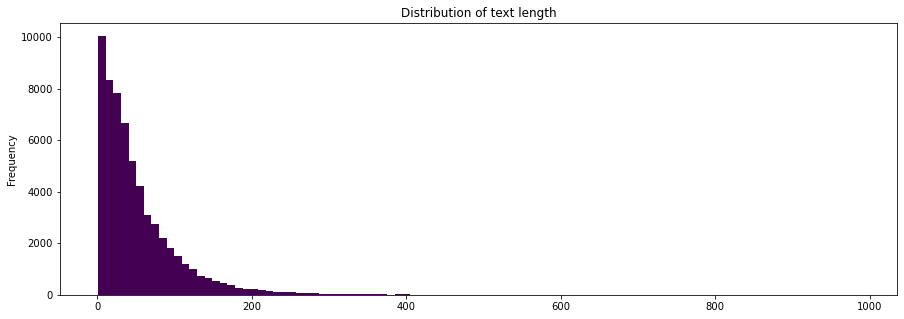

In [8]:
# Calculate the length of the texts
df['length'] = df['text'].apply(len)

# Visualize the distribution of text length
df['length'].plot(bins=100,kind='hist', colormap ='viridis', title = "Distribution of text length", figsize=(15,5))

In [9]:
# Check the longest line and descriptive statistics of lines
df['length'].describe()

# minimum length is 1, maximum length 986 --> minimum to be filtered out when removing stopwords
# average length is 52.5, median is 36 characters

count    60676.000000
mean        52.509889
std         54.083674
min          1.000000
25%         17.000000
50%         36.000000
75%         70.000000
max        986.000000
Name: length, dtype: float64

Last but not least, I also checked the longest line that consisted of 986 characters and belonged to Monica in season 8 episode 18.

In [10]:
# Longest line consists of 986 characters
df[df['length'] == 986].iloc[0]
# Monica talking to her parents in season 8 episode 18 is the longest line in the show

text         No, no it's going to be great. Really! Mom, Da...
speaker                                          Monica Geller
season                                                       8
episode                                                     18
scene                                                        4
utterance                                                   76
se                                                        8/18
length                                                     986
Name: 53412, dtype: object

### Text preprocession

As part of text preprocession, I first removed punctuations from the raw and stored the result under the column 'clean_text'. Then I imported an extended list of stop words from GitHub and removed words that were on the list. Also, I kept words that are 3 characters or longer in order to filter out unneccessary expressions, such as uh, um, etc.
As the last step of preprocession, I tokenized the text and stored the tokens under the column 'tokens' and a separate list 'tokenized' for further analysis.

In [11]:
# Remove punctuations
def remove_punc(string):
    punc=[",", ".", ";","\'", "?", "&", "-", "\"", ":", "(", ")", "/", "♪", "0","1","2","3","4","5","6","7","8","9", "!", "*", "+"]
    string_nopunc= ""
    for char in string:
        if char not in punc:
            string_nopunc=string_nopunc + char
    return(string_nopunc.lower())
 
df['clean_text'] = df['text'].apply(remove_punc)

In [12]:
# Remove stopwords
import requests
stopwords_list = requests.get("https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt").content
stops = set(stopwords_list.decode().splitlines()) 
# added extra stop words after looking at the most common words
extra_stops = {'gonna', 'yeah', 'hey', 'gotta', 'wanna'}

stops = stops.union(extra_stops)
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops) and len(word) > 3]))

In [13]:
# Create column for corpus
df = df.reset_index()
df['tokens'] = ''
for i in range(len(df)):
    df['tokens'][i] = nltk.word_tokenize(df['clean_text'][i])

C:\Users\vargh\AppData\Local\Temp/ipykernel_34428/3902138024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'][i] = nltk.word_tokenize(df['clean_text'][i])


In [14]:
# store tokens in a list
texts = df['clean_text']
tokenized=[]
for element in texts:
    if element not in (stops or extra_stops):
        tokenized.extend(element.split())

print('The number of tokens is {}.'.format(len(tokenized)))

The number of tokens is 131799.


In [15]:
df.head(10)

,index,text,speaker,season,episode,scene,utterance,se,length,clean_text,tokens
0,0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1,1/1,56,,[]
1,1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2,1/1,80,wrong,[wrong]
2,2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3,1/1,72,joey nice hump hump hairpiece,"[joey, nice, hump, hump, hairpiece]"
3,3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4,1/1,24,wait chalk,"[wait, chalk]"
4,5,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,1,1,1,6,1/1,79,carl,[carl]
5,6,"Okay, everybody relax. This is not even a date...",Monica Geller,1,1,1,7,1/1,109,relax people dinner,"[relax, people, dinner]"
6,7,Sounds like a date to me.,Chandler Bing,1,1,1,8,1/1,25,sounds,[sounds]
7,9,"Alright, so I'm back in high school, I'm stand...",Chandler Bing,1,1,1,10,1/1,115,alright school standing middle cafeteria reali...,"[alright, school, standing, middle, cafeteria,..."
8,11,"Then I look down, and I realize there's a phon...",Chandler Bing,1,1,1,12,1/1,57,realize phone,"[realize, phone]"
9,12,Instead of...?,Joey Tribbiani,1,1,1,13,1/1,14,,[]


## Analytical questions

### 1. Which characters had the highest/lowest number of lines in the show?
To visualize the 10 characters who spoke the most in the tv show, I created a bar chart. Not surprisingly, the 6 main characters (Rachel, Ross, Chandler, Monica, Joey, Phoebe) had the highest number of lines, followed by the major love interests of the main characters: Mike (Phoebe's boyfriend and later husband), Richard (Monica's ex-boyfriend), Janice (Chandler's ex-girlfriend) and Carol (Ross's first wife).
When the main characters were excluded, further exes and family members made into the top 10: Charlie (Ross'a ex-girlfriend from the final season), Judy and Jack Geller (Monica's and Ross's parents), Frank Buffay Jr. (Phoebe's half brother), Emily (Ross's 2nd wife), and Tag (Rachel's ex-boyfriend).

<AxesSubplot:title={'center':'Excluding main characters'}>

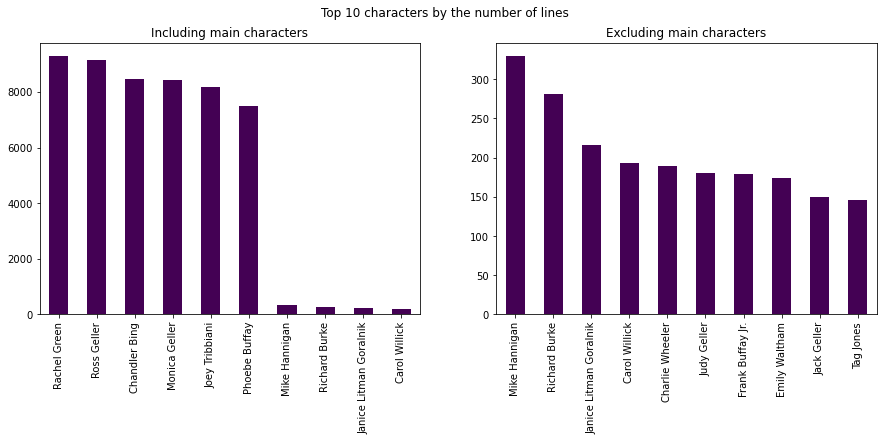

In [16]:
# create df without main characters
main_characters = ['Rachel Green', 'Ross Geller', 'Monica Geller', 'Phoebe Buffay', 'Joey Tribbiani', 'Chandler Bing']
df_no_main = df[~df['speaker'].isin(main_characters)]

# plot top 10 characters incl. and excl. main characters
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Top 10 characters by the number of lines')
df['speaker'].value_counts().head(10).plot(kind='bar', colormap ='viridis', title = "Including main characters", ax=axes[0])
df_no_main['speaker'].value_counts().head(10).plot(kind='bar', colormap ='viridis', title = "Excluding main characters", figsize=(15,5), ax=axes[1])

### 2. What are the most common words/bigrams/trigrams in the script?
To get a better view on which words, and phrases were the most common in the tv show, I created three barcharts.

In the first bar chart we can see the top 10 most common words in the script (excluding stop words). As expected, the names of 5 out of 6 main characters were among the most words. The only exception is Phoebe, who was also the one with the lowest number of lines among the main characters. This might be because she was the only one who didn't live the same building/neighbourhood as the others and didn't date  with or was related to any of the other main character.

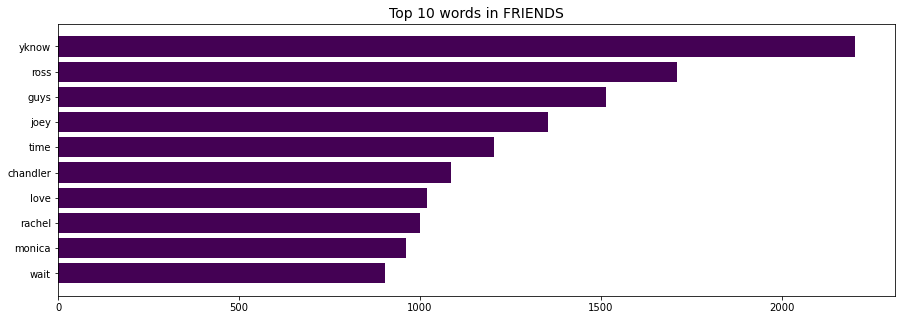

In [17]:
from collections import Counter

def plot_words(words,title):
    counts = {}
    for i in range(len(words)):
        counts[words[i][0]] = words[i][1]
    plt.figure(figsize=(15,5))
    plt.title(title, fontsize=14)
    plt.barh(range(len(counts)), list(counts.values()),align="center", color = "#440154FF")
    plt.yticks(range(len(counts)), list(counts.keys()))
    plt.gca().invert_yaxis()
    plt.show()
    
plot_words(Counter(tokenized).most_common(10), "Top 10 words in FRIENDS")


In the second bar chart we can see the most common bigrams. Here we can also find the repeated or full names of some of the main characters, while the other popular bigrams are common phrases in spoken English, such as "wait, wait" or "whoa, whoa" or "wait (a) minute). 

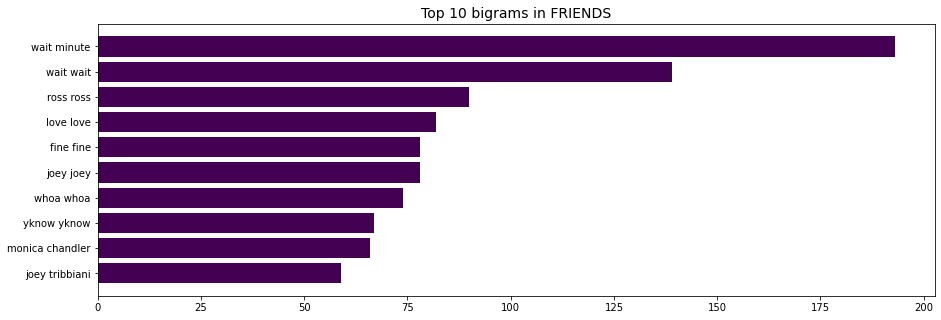

In [18]:
def plot_ngrams(ngrams,title):
    counts = {}
    for i in range(len(ngrams)):
        counts[" ".join(ngrams[i][0])] = ngrams[i][1]
    plt.figure(figsize=(15,5))
    plt.title(title, fontsize=14)
    plt.barh(range(len(counts)), list(counts.values()), color = "#440154FF",align = "center")
    plt.yticks(range(len(counts)), list(counts.keys()))
    plt.gca().invert_yaxis()
    plt.show()

bigram = nltk.FreqDist(nltk.bigrams(w.lower() for w in tokenized))
plot_ngrams(bigram.most_common(10), "Top 10 bigrams in FRIENDS")

In the third bar chart I visualized the top 10 trigrams in the show, which - similarly to bigrams - was dominated by the names of main characters and common phrases.

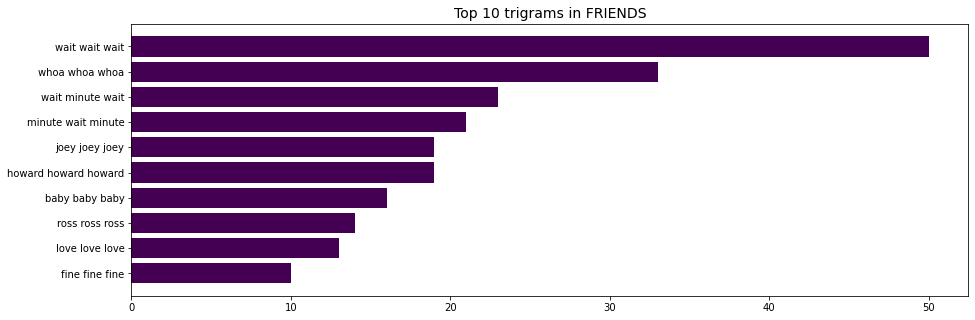

In [19]:
trigram = nltk.FreqDist(nltk.trigrams(w.lower() for w in tokenized))
plot_ngrams(trigram.most_common(10), "Top 10 trigrams in FRIENDS")

### 3. How did the sentiment of the TV show change over time? 
For sentiment analysis, I used the vaderSentiment library and run the code on the raw text instead of the cleaned version, as in this case I wanted to include all words (including the stop words) to calculate the sentiment of each line.
After calculating the polarity scores for positive, negative and neutral sentiments, I classified each line into this categories based on a simple rule (Positive when polarity score > 0.05, Neutral when polarity score between -0.05 and 0.05 and Negative when polarity score is below -0.05).
To see how the sentiment changed over the seasons, I created a line plot with the Positive and Negative sentiments. From the chart below we can see that after the first two seasons, both the ratio of positive and the negative sentiments started to increase in season 3 and stagnated around this level until season 8. In season 9 the ratio of Positive decreased while the ratio of Negative sentiment slightly increased, which could be explained by Monica's and Chandler's fertility issues combined with Chandler's unfortunate transfer to Tulsa at work. In the final season, positivity slightly increased while nagtivity decreased, which is not surprising considering that almost all main characters got their happy endings (e.g. Chandler and Monica becoming parents, Rachel and Ross getting back together, Phoebe getting married).

In [20]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate sentiment polarity scores
sentiment = SentimentIntensityAnalyzer()
df['polarity_score']=df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
df['neutral'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
df['negative'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
df['positive'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

#classify the sentiment of each line
df.loc[df.polarity_score>0.05,'sentiment']='Positive'
df.loc[(df.polarity_score>-0.05) & (df.polarity_score<0.05),'sentiment']='Neutral'
df.loc[df.polarity_score<-0.05,'sentiment']='Negative'

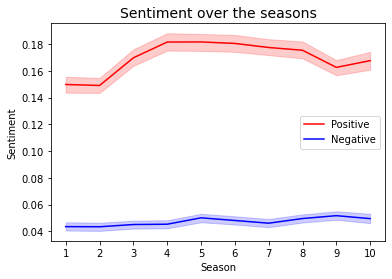

In [21]:
# visualization
sns.lineplot(x="season", 
            y="positive",
            color = "red",
            data=df)

sns.lineplot(x="season", 
            y="negative",
            color = 'blue',
            data=df)

plt.title("Sentiment over the seasons", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Sentiment")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(labels=["Positive","Negative"])


### 4. Which main character was the most positive/negative?
To see which main character was the most positive/negative, I created to data frames where I stored the average level of positivity and negativity by main characters.
As we can see from  the bar charts below, Rachel was the most positive character, closely followed by Phoebe. To my surprise, Joey got only the 4th place behind Ross, although he is usually described as the most joyful character in the show.
The most negative character was Chandler and Monica, which was expected due to Monica's self-esteem issues and Chandler's childhood traumas and sarcastic humour.

In [22]:
df_main = df[df['speaker'].isin(main_characters)]
positivity_by_char = df_main.groupby('speaker')['positive'].mean().sort_values(ascending = False)
negativity_by_char = df_main.groupby('speaker')['negative'].mean().sort_values(ascending = False)

<AxesSubplot:title={'center':'Negativity'}, xlabel='speaker'>

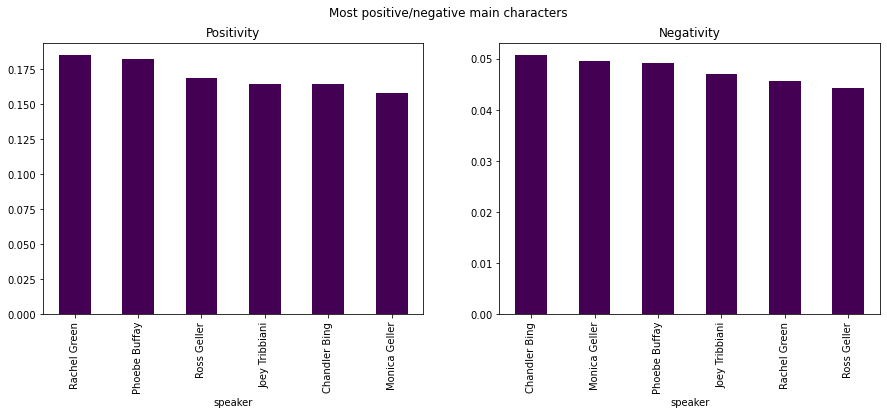

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Most positive/negative main characters')
positivity_by_char.plot(kind='bar',  
                title='Positivity',
                colormap='viridis',
                ax=axes[0])
negativity_by_char.plot(kind='bar', 
                figsize=(15,5), 
                title='Negativity',
                colormap='viridis',
                ax=axes[1])

### 5. Which were the most common words of the main characters?
To visualize which where the most used words by the main characters, I decided to create wordclouds with the WordCloud library. In order to do so, I first created separate data frames for the clean text filtered for each main character and generated six workclouds from them. 
The most interesting part of the visualization was how it implied which characters where in the closest relationship with each other. While all main characters where mentioned frequently by the others, some patterns can be identified:
- Joey mentioned his two male friends, Ross and Chandler most often. However, it was interesting to see that he said Chandler's name less often as Ross's, however, Chandler was his best friend.
- Not surprisingly, Rachel's name is among the most common ones in case of Ross.
- Monica mentioned Chandler (her husband) and Phoebe (one of here closest female friends) the most often, while - in a somewhat analogical manner - Monica and Joey (his best friend) were the most popular friends in case of Chandler.
- In case of Rachel and Phoebe, it was a huge surprise that Chandler was the most often called friend, despite the fact that none of them were particulary close to him. This might be explained with the fact that Chandler often 'annoyed' his friends with his sarcastic humor and silly jokes, so Rachel and Phoebe might have rebuked him often. 

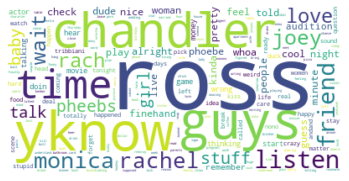

In [24]:
# Joey
joey = df[df['speaker'] == "Joey Tribbiani"]['clean_text']
tokens_joey=[]
for element in joey:
    tokens_joey.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_joey =(" ").join(tokens_joey)

from wordcloud import WordCloud
wc_joey = WordCloud(collocations = False, background_color = 'white').generate(text_joey)
plt.imshow(wc_joey, interpolation='bilinear')
plt.axis("off")
plt.show()

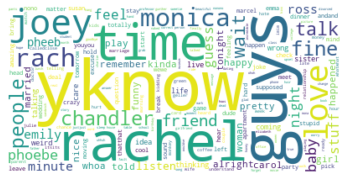

In [25]:
# Ross
ross = df[df['speaker'] == "Ross Geller"]['clean_text']
tokens_ross=[]
for element in ross:
    tokens_ross.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_ross =(" ").join(tokens_ross)

from wordcloud import WordCloud
wc_ross = WordCloud(collocations = False, background_color = 'white').generate(text_ross)
plt.imshow(wc_ross, interpolation='bilinear')
plt.axis("off")
plt.show()

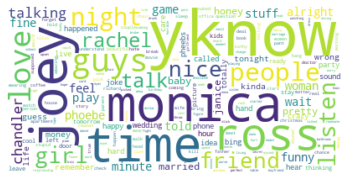

In [26]:
# Chandler
chandler = df[df['speaker'] == "Chandler Bing"]['clean_text']
tokens_chandler=[]
for element in chandler:
    tokens_chandler.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_chandler =(" ").join(tokens_chandler)

from wordcloud import WordCloud
wc_chandler = WordCloud(collocations = False, background_color = 'white').generate(text_chandler)
plt.imshow(wc_chandler, interpolation='bilinear')
plt.axis("off")
plt.show()

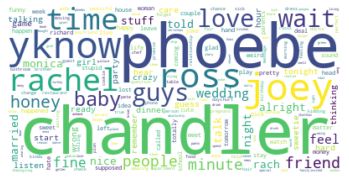

In [27]:
# Monica
monica = df[df['speaker'] == "Monica Geller"]['clean_text']
tokens_monica=[]
for element in monica:
    tokens_monica.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_monica =(" ").join(tokens_monica)

from wordcloud import WordCloud
wc_monica = WordCloud(collocations = False, background_color = 'white').generate(text_monica)
plt.imshow(wc_monica, interpolation='bilinear')
plt.axis("off")
plt.show()

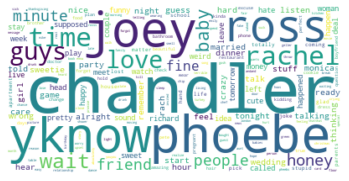

In [28]:
# Rachel
rachel = df[df['speaker'] == "Rachel Green"]['clean_text']
tokens_rachel=[]
for element in rachel:
    tokens_rachel.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_rachel =(" ").join(tokens_monica)

from wordcloud import WordCloud
wc_rachel = WordCloud(collocations = False, background_color = 'white').generate(text_rachel)
plt.imshow(wc_rachel, interpolation='bilinear')
plt.axis("off")
plt.show()

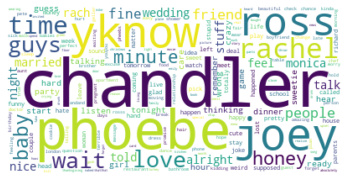

In [29]:
# Phoebe
phoebe = df[df['speaker'] == "Phoebe Buffay"]['clean_text']
tokens_phoebe=[]
for element in phoebe:
    tokens_phoebe.extend(element.split())
    
#convert list of tokens to unique string to be able to generate worcloud
text_phoebe =(" ").join(tokens_monica)

from wordcloud import WordCloud
wc_phoebe = WordCloud(collocations = False, background_color = 'white').generate(text_phoebe)
plt.imshow(wc_phoebe, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion
The analysis provided some interesting and not obvious insights on FRIENDS, such as the most positive and negative main characters according to the sentiment analysis of the scripts, the characters with the highest number of lines, and the overall sentiment of the show. However, further analysis would be needed to get a better insight on the actual relationship between characters and using various methods, such as lemmatization or stemming for text normalization might lead to different results (especially in case of the most common words/bigrams/trigrams in the text and thus the character-specific worldclouds).